<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/5.Closed-Loop/Efeitos_PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -qq control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 11.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import sympy as sp

In [ ]:
def calcula_zpk(G):
  z = ct.zero(G) # zeros
  p = ct.pole(G) # polos
  K = ct.dcgain(G) # ganho estacionário
  print('zero = ', z)
  print('polo = ', p)
  print(f'ganho = {K:1.3f}')
  if len(p)<2:
    # apenas para sistemas de primeira ordem
    print(f'constante de tempo = {1/abs(p[0]):1.3f}')

def caracteristica_2ordem(G):
  num, den = ct.tfdata(G) # fornece o numerador e denominador de uma FT
  deng = den[0][0] # representa o denominador (den = a*s**2 + b*s + c)
  tau = np.sqrt(deng[0]/deng[2]) # periodo natural: sqrt(a/c)
  xi = (deng[1]/deng[2])/(2*tau) # fator de amortecimento: (b/c) / (2*tau)
  print(f'Período natural = {tau:1.3f}')
  print(f'Fator de amortecimento = {xi:1.3f}')
  if np.real(xi) < 1.0 and len(num)>1:
    # apenas para sistemas subamortecidos e sem dinâmica no numerador
    tp = np.pi*tau/np.sqrt(1-xi**2) # tempo de pico (quando surge o overshoot)
    ts = 7*tau/xi # tempo de assentamento (reposta alcança o estado estacionário)
    OS = np.exp(-np.pi*xi/np.sqrt(1-xi**2)) # Overshoot (elevação em relação ao valor final)
    DR = OS**2 # taxa de decaimento das oscilações
    print(f'%Overshoot = {100*OS: 1.3f}')
    print(f'Decay ratio = {DR:1.3f}')
    print(f'Tempo de pico = {tp:1.3f}')
    print(f'Tempo de assentamento = {ts:1.3f}')

def resposta_degrau(G):
  plt.figure(figsize = (5,3))
  # resposta ao degrau unitário (deve-se usar o tempo-morto)
  t, y = ct.step_response(G)
  plt.plot(t,y)
  plt.xlabel('Tempo, t')
  plt.ylabel('Saída do sistema, y')
  plt.title('Resposta ao degrau unitário')
  plt.grid()

In [ ]:
# Processo
s = ct.tf('s')
Gp =1/s
print(Gp)

# Parametros da resposta em malha fechada
tau = 1.0
xsi = 0.65


1
-
s



In [ ]:
# Fazendo a malha fechada de modo símbolico
Kc, tauI, s = sp.symbols('K_c, tau_I, s')

# Controlador
Gc = Kc*(1+1/(tauI*s))

# Processo
Gp_ = 1/s


# Malha fechada
G = Gc*Gp_/(1+Gc*Gp_)
G.expand().simplify()

K_c*(s*tau_I + 1)/(K_c*s*tau_I + K_c + s**2*tau_I)

O sistema em malha fechada deve ser colocado na forma padrão, tal que
$ G(s) = Z(s)/(\tau s^2 + 2\tau \xi s + 1)$.

Para colocar nesta forma, basta dividir por $Kc$ o numerador e o denominador.

In [ ]:
# Mostrando as operações do denominador
den = Kc/tauI*s**2 + tauI *s + 1
den

K_c*s**2/tau_I + s*tau_I + 1

In [ ]:
# Comparando termo a termo
tauI = 2*xsi*tau # 2 xsi tau = tauI
Kc = tauI

(Kc, tauI)

(1.3, 1.3)

In [ ]:
# Vamos fechar a malha com estes valores:
# Controlador
Gc = Kc*(1+1/(tauI*s))

# Processo
Gp = 1/s

# Malha fechada
G = Gc*Gp/(1+Gc*Gp)
G = ct.minreal(G)
print('y/yset = ')
print(G)

2 states have been removed from the model
y/yset = 

   1.3 s + 1
---------------
s^2 + 1.3 s + 1



zero =  [-0.76923077+0.j]
polo =  [-0.65+0.75993421j -0.65-0.75993421j]
ganho = 1.000
Período natural = 1.000
Fator de amortecimento = 0.650


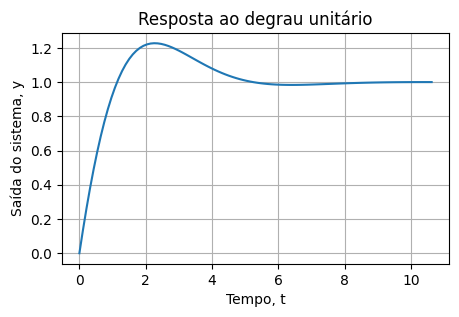

In [ ]:
calcula_zpk(G)
caracteristica_2ordem(G)
resposta_degrau(G)

In [ ]:
# Calculo do offset frente a um degrau unitário em yset
K = G.dcgain() # ganho estacionario da malha fechada
yset = 1.0
off_set = yset - K
off_set

-2.220446049250313e-16